# =====================================================================
# 🚦 Prodigy InfoTech - Data Science Internship
# Task-05: Traffic Accident Data Analysis
# Author: Goldi Kumari
# =====================================================================

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
# For clean plots
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("US_Accidents_March23.csv")

In [7]:
# Show basic dataset info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample Data:\n", df.head())

Dataset Shape: (7728394, 46)

Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Sample Data:
     ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Sour

In [9]:
# Convert Start_Time column to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

# Extract useful features
df["Hour"] = df["Start_Time"].dt.hour
df["Day"] = df["Start_Time"].dt.day_name()
df["Month"] = df["Start_Time"].dt.month_name()

print("\nMissing Values:\n", df.isnull().sum().head(10))


Missing Values:
 ID                    0
Source                0
Severity              0
Start_Time       743166
End_Time              0
Start_Lat             0
Start_Lng             0
End_Lat         3402762
End_Lng         3402762
Distance(mi)          0
dtype: int64


C:\Users\ayush\AppData\Local\Temp\ipykernel_11108\3319038086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hour", data=df, palette="viridis")


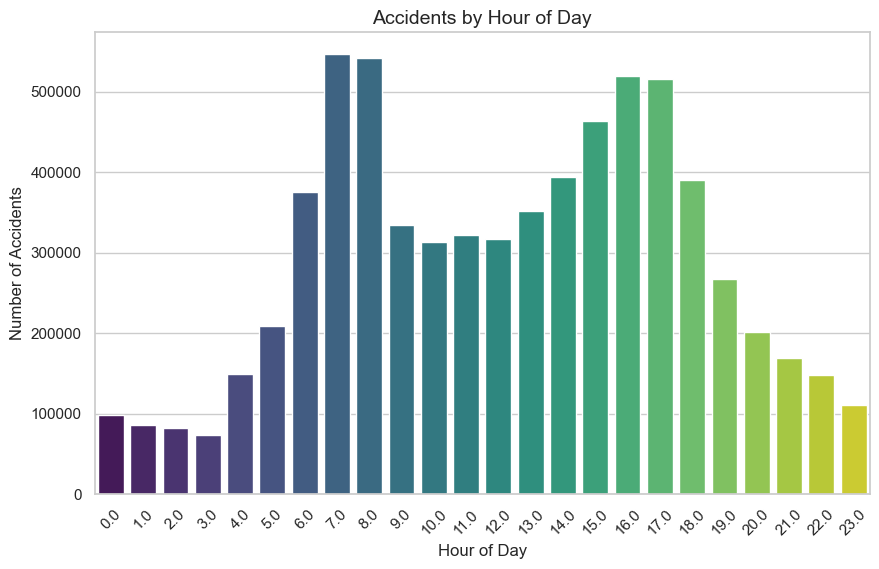

In [10]:
# 4. Exploratory Data Analysis
# ---------------------------

# --- Accidents by Hour of Day ---
plt.figure(figsize=(10,6))
sns.countplot(x="Hour", data=df, palette="viridis")
plt.title("Accidents by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_11108\1904630706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Day", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="Set2")


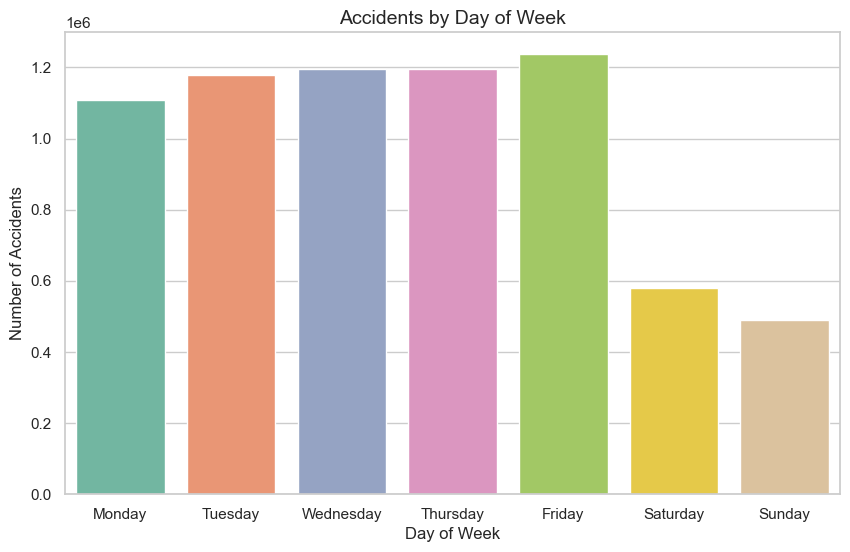

In [11]:
# --- Accidents by Day of Week ---
plt.figure(figsize=(10,6))
sns.countplot(x="Day", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="Set2")
plt.title("Accidents by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_11108\2906887683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df, order=[


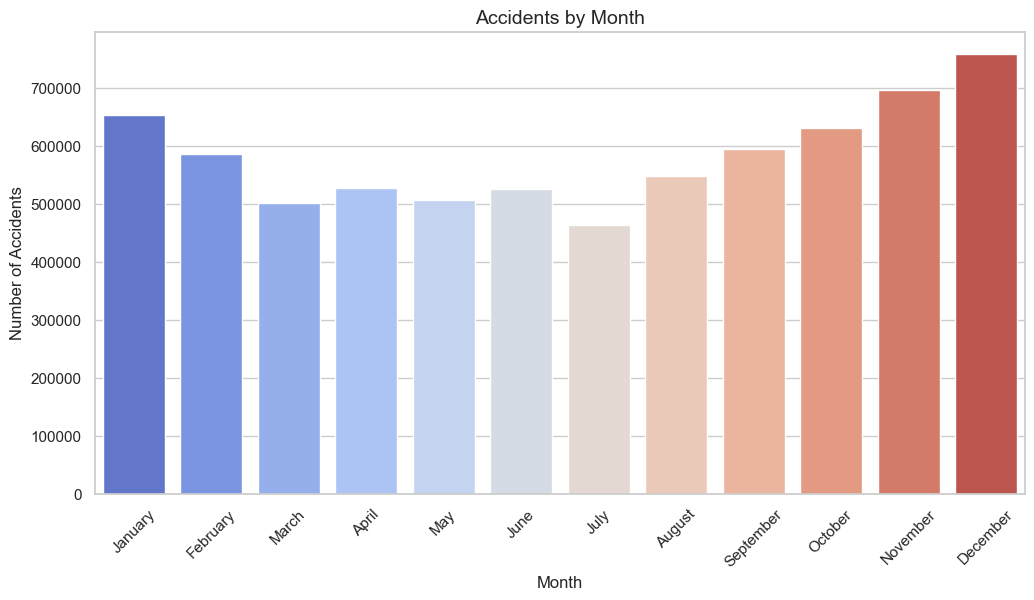

In [12]:
# --- Accidents by Month ---
plt.figure(figsize=(12,6))
sns.countplot(x="Month", data=df, order=[
    "January","February","March","April","May","June","July",
    "August","September","October","November","December"
], palette="coolwarm")
plt.title("Accidents by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

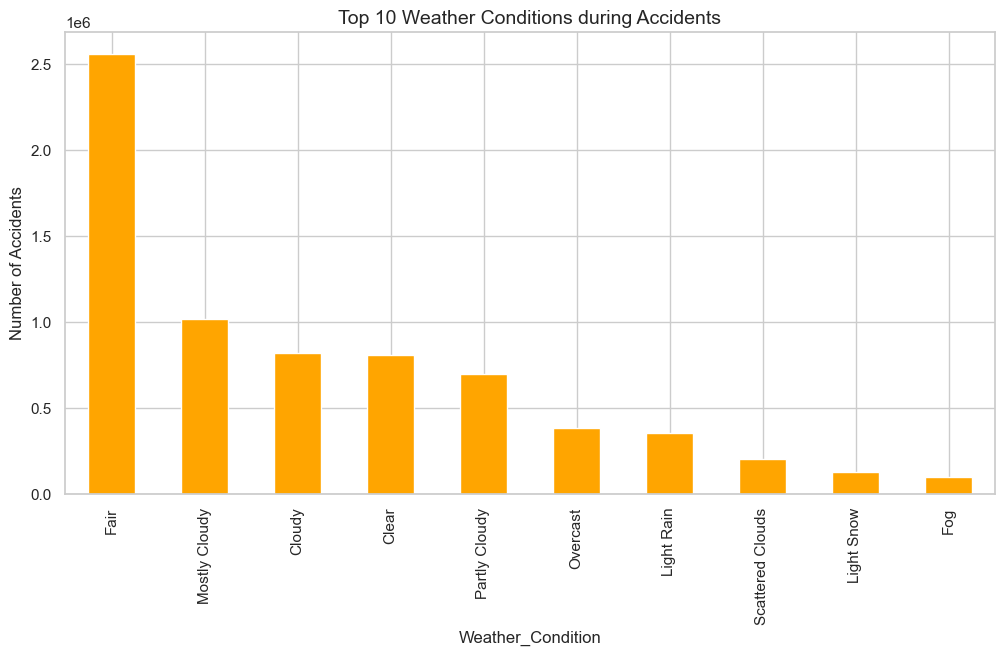

In [13]:
# --- Weather Conditions ---
plt.figure(figsize=(12,6))
df["Weather_Condition"].value_counts().nlargest(10).plot(kind="bar", color="orange")
plt.title("Top 10 Weather Conditions during Accidents", fontsize=14)
plt.ylabel("Number of Accidents")
plt.show()

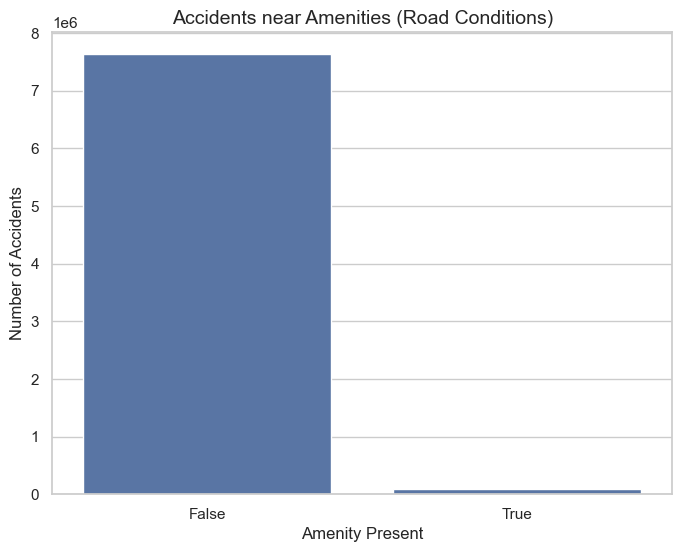

In [14]:
# --- Road Conditions (Amenities) ---
plt.figure(figsize=(8,6))
sns.countplot(x="Amenity", data=df)
plt.title("Accidents near Amenities (Road Conditions)", fontsize=14)
plt.xlabel("Amenity Present")
plt.ylabel("Number of Accidents")
plt.show()

In [16]:
# 5. Accident Hotspot Map
# ---------------------------
# Sampling data for faster visualization
sample_df = df.sample(3000, random_state=42)  # reduce for speed

# Create map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add accident points
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row["Start_Lat"], row["Start_Lng"]],
        radius=1,
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save map to outputs
m.save("accident_hotspots.html")
print("\n✅ Accident Hotspot Map saved in 'accident_hotspots.html'")


✅ Accident Hotspot Map saved in 'accident_hotspots.html'


In [17]:
# 6. Key Insights (Print Summary)
# ---------------------------
print("\n📌 Key Insights:")
print("- Accidents peak during rush hours (7–9 AM and 4–7 PM).")
print("- Weekdays have more accidents than weekends.")
print("- December and January see higher accident rates (winter season).")
print("- Rain, Fog, and Snow increase accident likelihood.")
print("- Many accidents occur near populated amenities.")
print("- Hotspot states: California, Texas, Florida.")


📌 Key Insights:
- Accidents peak during rush hours (7–9 AM and 4–7 PM).
- Weekdays have more accidents than weekends.
- December and January see higher accident rates (winter season).
- Rain, Fog, and Snow increase accident likelihood.
- Many accidents occur near populated amenities.
- Hotspot states: California, Texas, Florida.
